<a href="https://colab.research.google.com/github/annefrancine/DataScience_Estiam/blob/main/ACP_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages('FactoMineR')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘car’




In [4]:
install.packages('factoextra')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘viridis’, ‘rstatix’, ‘dendextend’, ‘ggpubr’




In [6]:
library("FactoMineR")
library("factoextra")
library("ggplot2")

In [7]:
# Nous utiliserons les jeux de données de démonstration decathlon2 du package factoextra:
data(decathlon2)
head(decathlon2)

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Rank,Points,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.0,7,8004,Decastar
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.1,8,7995,Decastar


In [8]:
summary(decathlon2)

     X100m         Long.jump        Shot.put       High.jump    
 Min.   :10.44   Min.   :6.800   Min.   :12.68   Min.   :1.860  
 1st Qu.:10.84   1st Qu.:7.210   1st Qu.:14.17   1st Qu.:1.930  
 Median :10.97   Median :7.310   Median :14.57   Median :1.980  
 Mean   :10.99   Mean   :7.365   Mean   :14.54   Mean   :1.998  
 3rd Qu.:11.13   3rd Qu.:7.545   3rd Qu.:15.01   3rd Qu.:2.080  
 Max.   :11.64   Max.   :7.960   Max.   :16.36   Max.   :2.150  
     X400m        X110m.hurdle       Discus        Pole.vault   
 Min.   :46.81   Min.   :13.97   Min.   :37.92   Min.   :4.400  
 1st Qu.:48.70   1st Qu.:14.15   1st Qu.:42.27   1st Qu.:4.660  
 Median :49.20   Median :14.34   Median :44.72   Median :4.900  
 Mean   :49.31   Mean   :14.50   Mean   :44.85   Mean   :4.836  
 3rd Qu.:49.86   3rd Qu.:14.87   3rd Qu.:46.93   3rd Qu.:5.000  
 Max.   :51.16   Max.   :15.67   Max.   :51.65   Max.   :5.400  
    Javeline         X1500m           Rank            Points       Competition
 Min.   :50

Selon la terminologie ACP, nos données contiennent des:

- Individus actifs (en bleu clair, lignes 1:23): individus qui sont utilisés lors de l’analyse en composantes principales.
- Individus supplémentaires (en bleu foncé, lignes 24:27): les coordonnées de ces individus seront prédites en utilisant l’information et les paramètres de l’ACP obtenue avec les individus/variables actifs.
- Variables actives (en rose, colonnes 1:10): variables utilisées pour l’ACP.
- Variables supplémentaires: comme les individus supplémentaires, les coordonnées de ces variables seront également prédites. On distingue des:
- Variables quantitatives supplémentaires (rouge): les colonnes 11 et 12 correspondent respectivement au rang et aux points des athlètes.
- Variables qualitatives supplémentaires (vert): Colonne 13 correspondant aux deux rencontres sportives (Jeux olympiques de 2004 ou Décastar 2004). Il s’agit d’une variable catégorielle. Elle peut être utilisée pour colorer les individus par groupes.

In [9]:
# Nous commençons par extraire les individus actifs et les variables actives pour l’ACP:
decathlon2.active <- decathlon2[1:23, 1:10]
head(decathlon2.active[, 1:6], 4)

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69
CLAY,10.76,7.40,14.26,1.86,49.37,14.05
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31


**Standardisation des données**

Dans l’analyse en composantes principales, les variables sont souvent normalisées. Ceci est particulièrement recommandé lorsque les variables sont mesurées dans différentes unités (par exemple: kilogrammes, kilomètres, centimètres, …); sinon, le résultat de l’ACP obtenue sera fortement affecté.

- X: jeu de données de type data frame. Les lignes sont des individus et les colonnes sont des variables numériques
- scale.unit: une valeur logique. Si TRUE, les données sont standardisées/normalisées avant l’analyse.
- ncp: nombre de dimensions conservées dans les résultats finaux.
- graph: une valeur logique. Si TRUE un graphique est affiché.

In [12]:
PCA(X, scale.unit = TRUE, ncp = 5, graph = TRUE)

ERROR: ignored

In [11]:
# Calculer l’ACP sur les individus/variables actifs:
library("FactoMineR")
res.pca <- PCA(decathlon2.active, graph = FALSE)

In [13]:
# Le résultat de la fonction PCA() est une liste, contenant les éléments suivants:
print(res.pca)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 23 individuals, described by 10 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

Visualisation et interprétation
Les fonctions suivantes, de factoextra, seront utilisées:

- get_eigenvalue(res.pca): Extraction des valeurs propres / variances des composantes principales
- fviz_eig(res.pca): Visualisation des valeurs propres
- get_pca_ind(res.pca), get_pca_var(res.pca): Extraction des résultats pour les individus et les variables, respectivement.
- fviz_pca_ind(res.pca), fviz_pca_var(res.pca): visualisez les résultats des individus et des variables, respectivement.
- fviz_pca_biplot(res.pca): Création d’un biplot des individus et des variables.

In [14]:
# Nous examinons les valeurs propres pour déterminer le nombre de composantes 
#principales à prendre en considération. Les valeurs propres et la proportion 
# de variances (i.e. information) retenues par les composantes principales 
#peuvent être extraites à l’aide de la fonction get_eigenvalue() 
#[package factoextra].

library("factoextra")
eig.val <- get_eigenvalue(res.pca)
eig.val


,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,4.1242133,41.242133,41.24213
Dim.2,1.8385309,18.385309,59.62744
Dim.3,1.2391403,12.391403,72.01885
Dim.4,0.8194402,8.194402,80.21325
Dim.5,0.7015528,7.015528,87.22878
Dim.6,0.4228828,4.228828,91.45760
Dim.7,0.3025817,3.025817,94.48342
Dim.8,0.2744700,2.744700,97.22812
Dim.9,0.1552169,1.552169,98.78029
Dim.10,0.1219710,1.219710,100.00000


La somme de toutes les valeurs propres donne une variance totale de 10.

La proportion de variance expliquée par chaque valeur propre est donnée dans la deuxième colonne. Par exemple, 4.124 divisé par 10 est égal à 0.4124, ou, environ 41.24% de la variation est expliquée par cette première valeur propre. Le pourcentage cumulé expliqué est obtenu en ajoutant les proportions successives de variances expliquées. Par exemple, 41.242% plus 18.385% sont égaux à 59.627%, et ainsi de suite. Par conséquent, environ 59.627% de la variance totale est expliquée par les deux premières valeurs propres.

Les valeurs propres peuvent être utilisées pour déterminer le nombre d’axes principaux à conserver après l’ACP (Kaiser 1961):

- Une valeur propre > 1 indique que la composante principale (PC) concernée représente plus de variance par rapport à une seule variable d’origine, lorsque les données sont standardisées. Ceci est généralement utilisé comme seuil à partir duquel les PC sont conservés. A noter que cela ne s’applique que lorsque les données sont normalisées.

- Vous pouvez également limiter le nombre d’axes à un nombre qui représente une certaine fraction de la variance totale. Par exemple, si vous êtes satisfaits avec 70% de la variance totale expliquée, utilisez le nombre d’axes pour y parvenir.

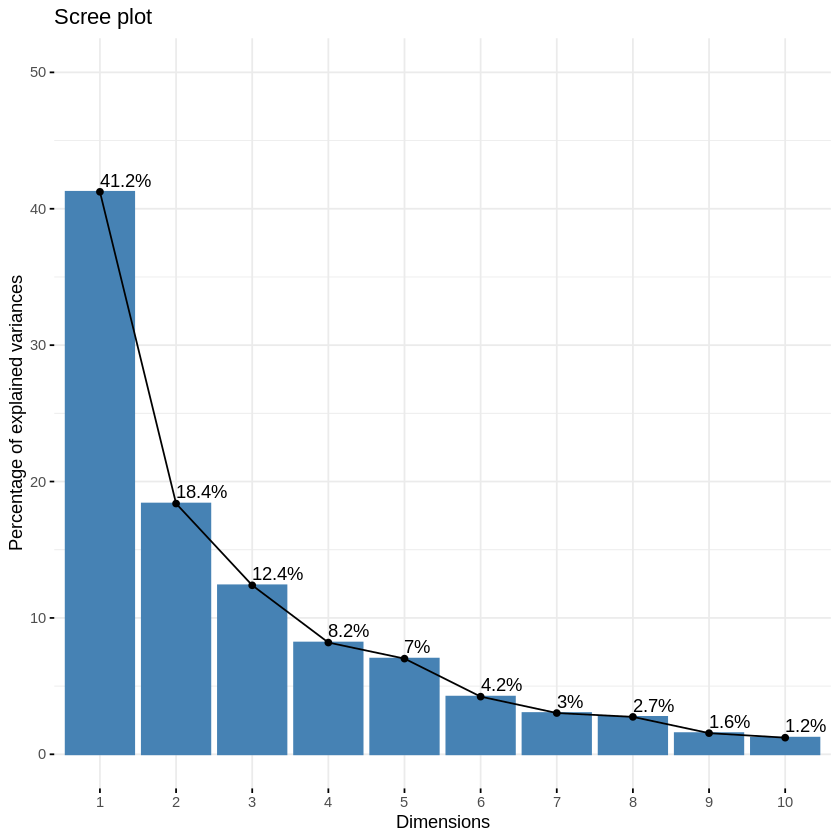

In [15]:
# Le graphique des valeurs propres peut être généré à l’aide de la fonction fviz_eig () ou fviz_screeplot () [package factoextra].
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50))

Résultats

Une méthode simple pour extraire les résultats, pour les variables, à partir de l’ACP est d’utiliser la fonction get_pca_var() [package factoextra].

Cette fonction retourne une liste d’éléments contenant tous les résultats pour les variables actives (coordonnées, corrélation entre variables et les axes, cosinus-carré et contributions)

In [16]:
var <- get_pca_var(res.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

Les composants de get_pca_var() peuvent être utilisés dans le graphique des variables comme suit:

- var$coord: coordonnées des variables pour créer un nuage de points.

- var$cos2: cosinus carré des variables. Représente la qualité de représentation des variables sur le graphique de l’ACP. Il est calculé comme étant les coordonnées au carré: var.cos2 = var.coord * var.coord.

- var$contrib: contient les contributions (en pourcentage), des variables, aux composantes principales. La contribution d’une variable (var) à une composante principale donnée: (var.cos2 * 100) / (total cos2 du composant).

In [17]:
# Coordonnées
head(var$coord)
# Cos2: qualité de répresentation
head(var$cos2)
# Contributions aux composantes principales
head(var$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,-0.8506257,-0.17939806,0.3015564,0.03357320,-0.1944440
Long.jump,0.7941806,0.28085695,-0.1905465,-0.11538956,0.2331567
Shot.put,0.7339127,0.08540412,0.5175978,0.12846837,-0.2488129
High.jump,0.6100840,-0.46521415,0.3300852,0.14455012,0.4027002
X400m,-0.7016034,0.29017826,0.2835329,0.43082552,0.1039085
X110m.hurdle,-0.7641252,-0.02474081,0.4488873,-0.01689589,0.2242200


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,0.7235641,0.0321836641,0.09093628,0.0011271597,0.03780845
Long.jump,0.6307229,0.0788806285,0.03630798,0.0133147506,0.05436203
Shot.put,0.5386279,0.0072938636,0.26790749,0.0165041211,0.06190783
High.jump,0.3722025,0.2164242070,0.10895622,0.0208947375,0.16216747
X400m,0.4922473,0.0842034209,0.08039091,0.1856106269,0.01079698
X110m.hurdle,0.5838873,0.0006121077,0.20149984,0.0002854712,0.05027463


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,17.544293,1.7505098,7.338659,0.13755240,5.389252
Long.jump,15.293168,4.2904162,2.930094,1.62485936,7.748815
Shot.put,13.060137,0.3967224,21.620432,2.01407269,8.824401
High.jump,9.024811,11.7715838,8.792888,2.54987951,23.115504
X400m,11.935544,4.5799296,6.487636,22.65090599,1.539012
X110m.hurdle,14.157544,0.0332933,16.261261,0.03483735,7.166193


In [18]:
# Cercle de corrélation
# Coordonnées des variables
head(var$coord, 4)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,-0.8506257,-0.17939806,0.3015564,0.0335732,-0.1944440
Long.jump,0.7941806,0.28085695,-0.1905465,-0.1153896,0.2331567
Shot.put,0.7339127,0.08540412,0.5175978,0.1284684,-0.2488129
High.jump,0.6100840,-0.46521415,0.3300852,0.1445501,0.4027002


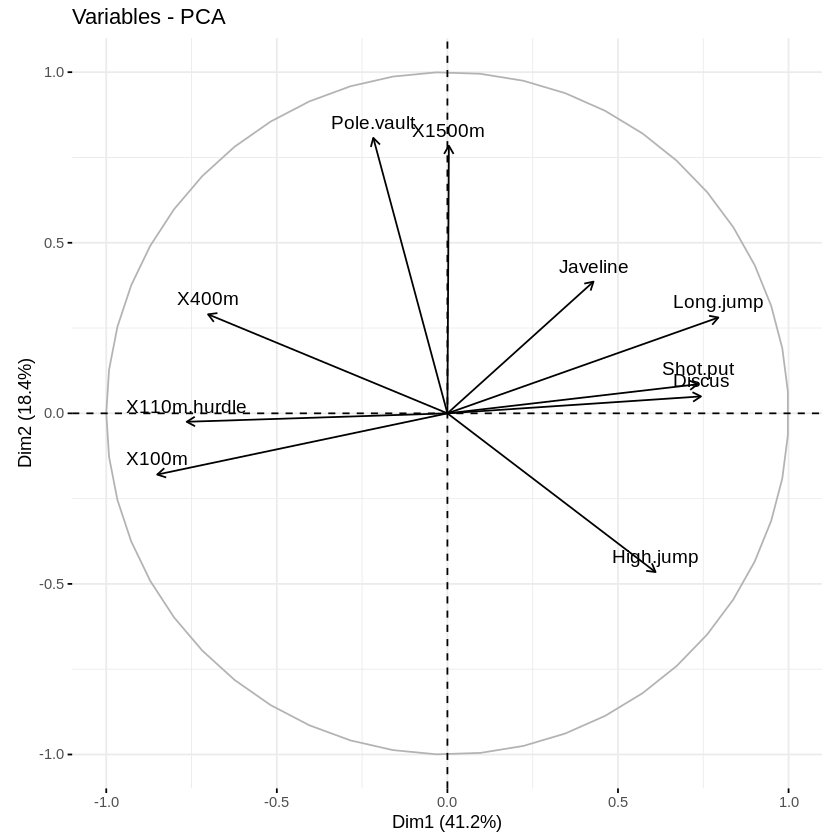

In [19]:
#Pour visualiser les variables, tapez ceci:
fviz_pca_var(res.pca, col.var = "black")

Le graphique ci-dessus est également connu sous le nom de graphique de corrélation des variables. Il montre les relations entre toutes les variables. Il peut être interprété comme suit:

- Les variables positivement corrélées sont regroupées.
- Les variables négativement corrélées sont positionnées sur les côtés opposés de l’origine du graphique (quadrants opposés).
- La distance entre les variables et l’origine mesure la qualité de représentation des variables. Les variables qui sont loin de l’origine sont bien représentées par l’ACP.

In [20]:
# La qualité de représentation des variables sur la carte de l’ACP s’appelle cos2 (cosinus carré) . 
# Vous pouvez accéder au cos2 comme suit

head(var$cos2, 4)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,0.7235641,0.032183664,0.09093628,0.00112716,0.03780845
Long.jump,0.6307229,0.078880629,0.03630798,0.01331475,0.05436203
Shot.put,0.5386279,0.007293864,0.26790749,0.01650412,0.06190783
High.jump,0.3722025,0.216424207,0.10895622,0.02089474,0.16216747


corrplot 0.89 loaded



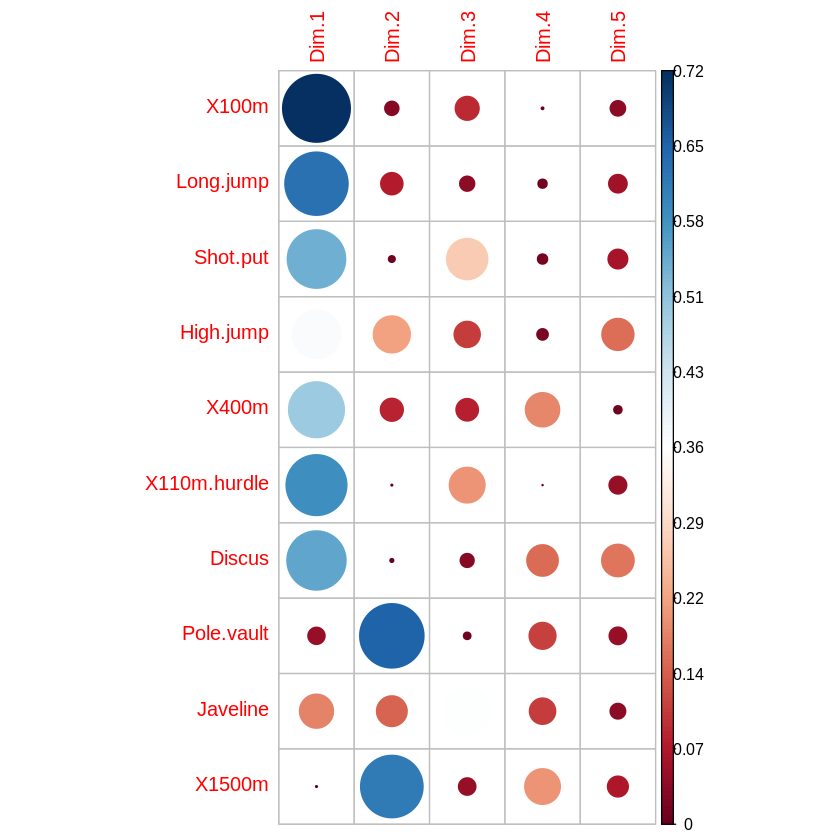

In [21]:
# Vous pouvez visualiser le cos2 des variables sur toutes les dimensions
# en utilisant le package corrplot
library("corrplot")
corrplot(var$cos2, is.corr=FALSE)

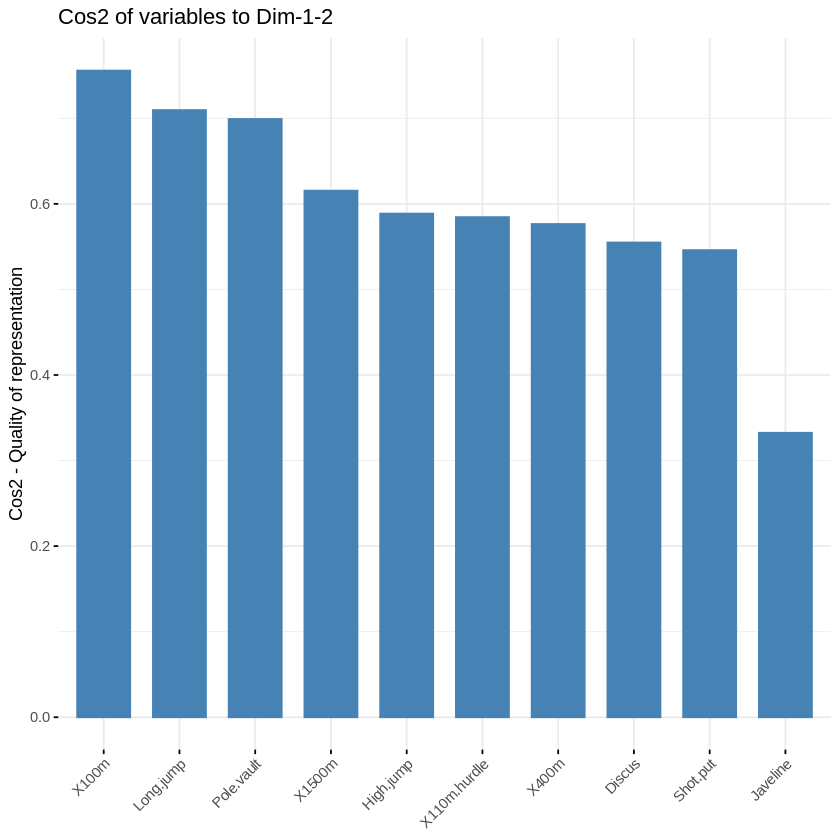

In [22]:
# Cos2 total des variables sur Dim.1 et Dim.2
fviz_cos2(res.pca, choice = "var", axes = 1:2)

- Un cos2 élevé indique une bonne représentation de la variable sur les axes principaux en considération. Dans ce cas, la variable est positionnée à proximité de la circonférence du cercle de corrélation.

- Un faible cos2 indique que la variable n’est pas parfaitement représentée par les axes principaux. Dans ce cas, la variable est proche du centre du cercle.

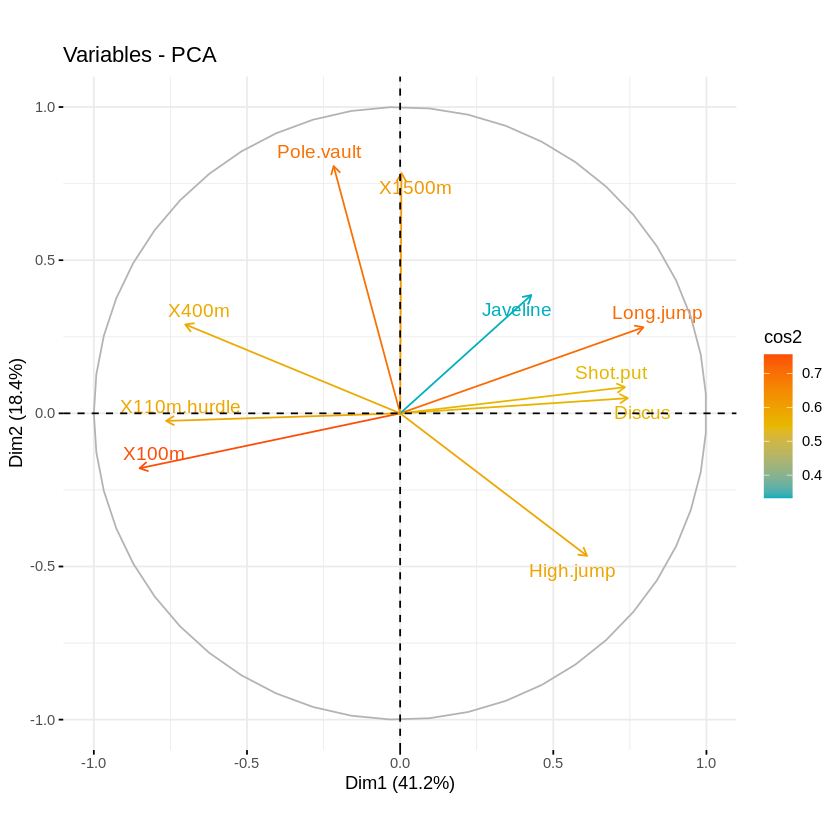

In [23]:
# Colorer en fonction du cos2: qualité de représentation
fviz_pca_var(res.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )

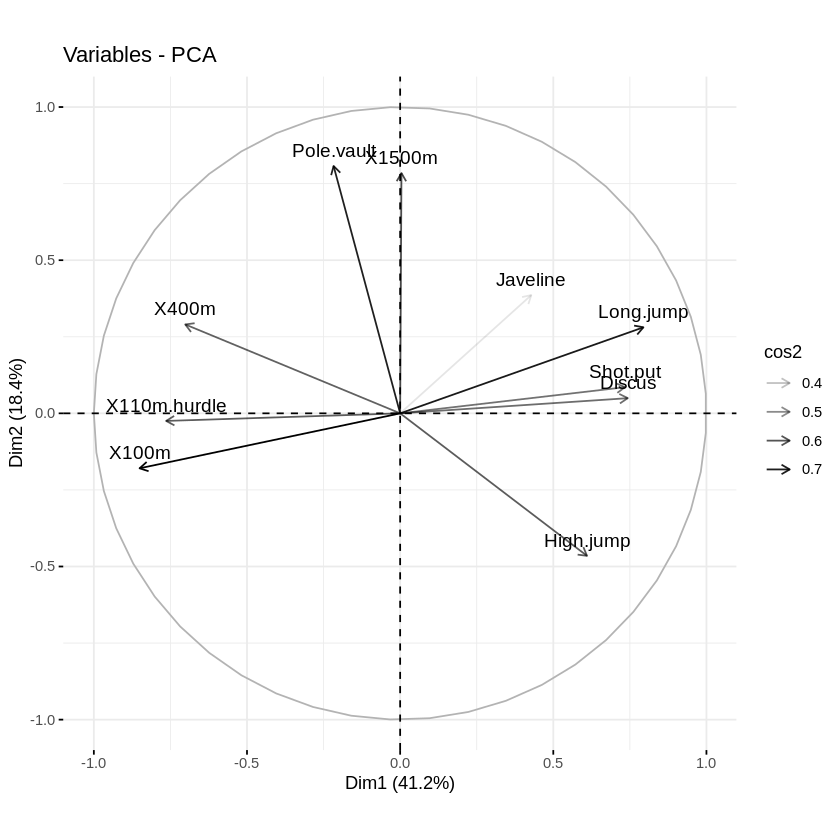

In [24]:
# Changer la transparence en fonction du cos2
fviz_pca_var(res.pca, alpha.var = "cos2")

Contributions des variables aux axes principaux
Les contributions des variables dans la définition d’un axe principal donné, sont exprimées en pourcentage.

- Les variables corrélées avec PC1 (i.e., Dim.1) et PC2 (i.e., Dim.2) sont les plus importantes pour expliquer la variabilité dans le jeu de données.
- Les variables qui ne sont pas en corrélation avec un axe ou qui sont corrélées avec les derniers axes sont des variables à faible apport et peuvent être supprimées pour simplifier l’analyse globale.
La contribution des variables peut être extraite comme suit:

In [25]:
head(var$contrib, 4)
# Plus la valeur de la contribution est importante, plus la variable contribue à la composante principale en question.

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,17.544293,1.7505098,7.338659,0.1375524,5.389252
Long.jump,15.293168,4.2904162,2.930094,1.6248594,7.748815
Shot.put,13.060137,0.3967224,21.620432,2.0140727,8.824401
High.jump,9.024811,11.7715838,8.792888,2.5498795,23.115504


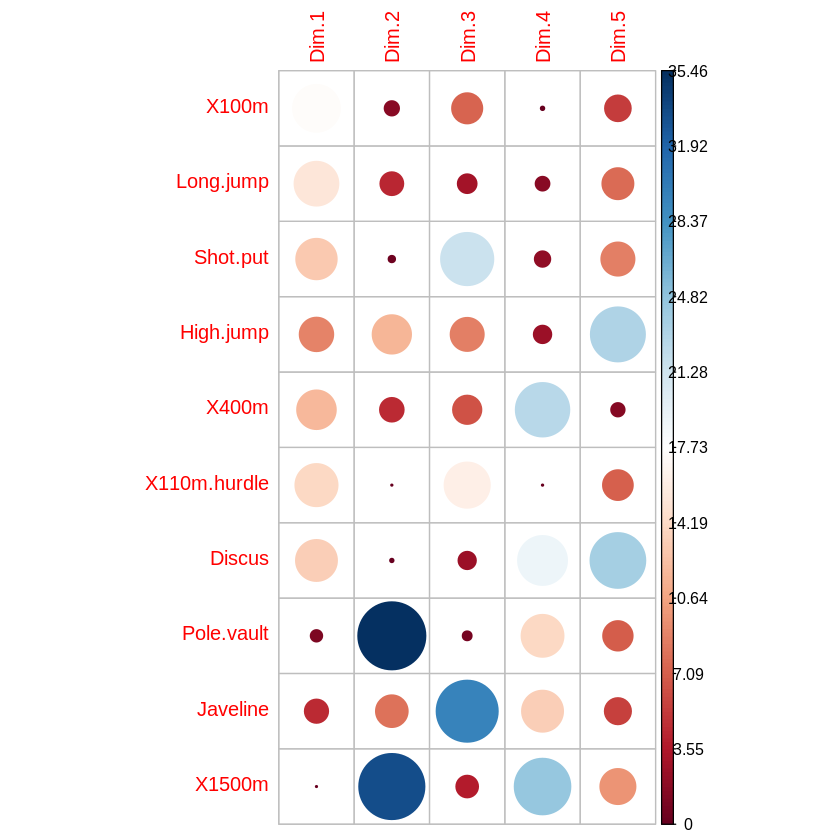

In [26]:
# Il est possible d’utiliser la fonction corrplot() [package corrplot] pour 
#mettre en évidence les variables les plus contributives pour chaque dimension:

library("corrplot")
corrplot(var$contrib, is.corr=FALSE) 

La fonction fviz_contrib() [package factoextra] peut être utilisée pour créer un bar plot de la contribution des variables. Si vos données contiennent de nombreuses variables, vous pouvez décider de ne montrer que les principales variables contributives. Le code R ci-dessous montre le top 10 des variables contribuant le plus aux composantes principales:

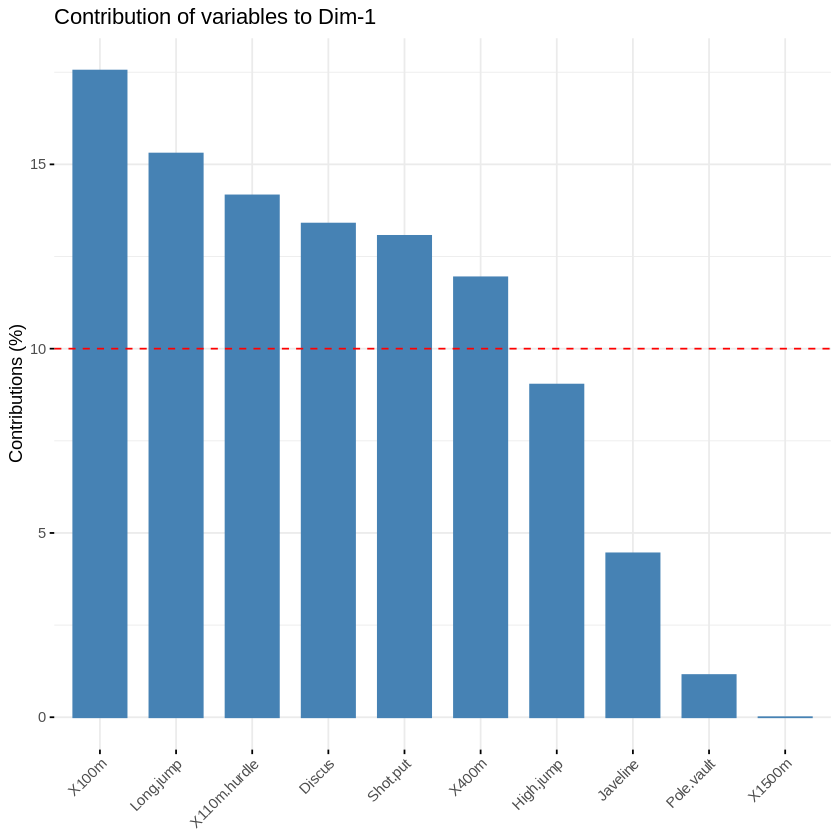

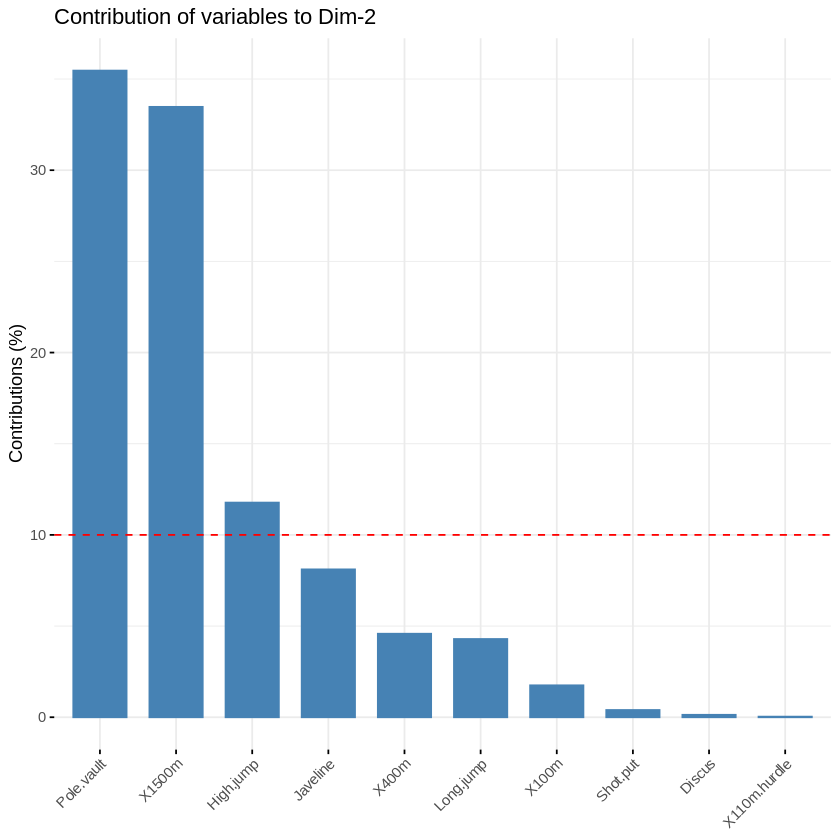

In [27]:
# Contributions des variables à PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)
# Contributions des variables à PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)

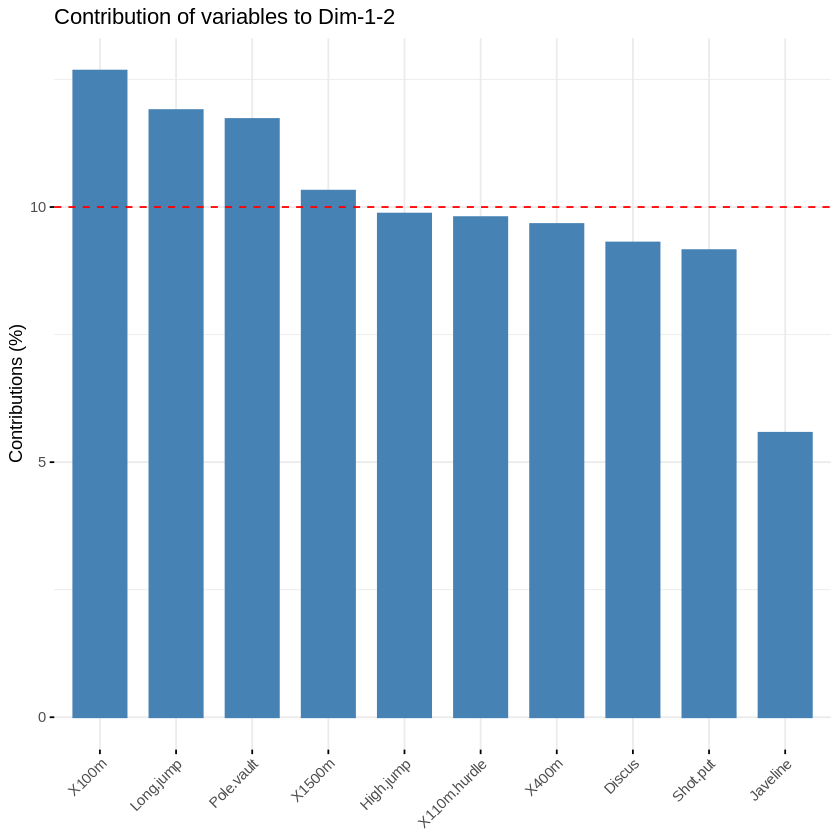

In [28]:
#La contribution totale à PC1 et PC2 est obtenue avec le code R suivant:
fviz_contrib(res.pca, choice = "var", axes = 1:2, top = 10)

Les variables les plus importantes (ou, contributives) peuvent être mises en évidence sur le graphe de corrélation comme suit:

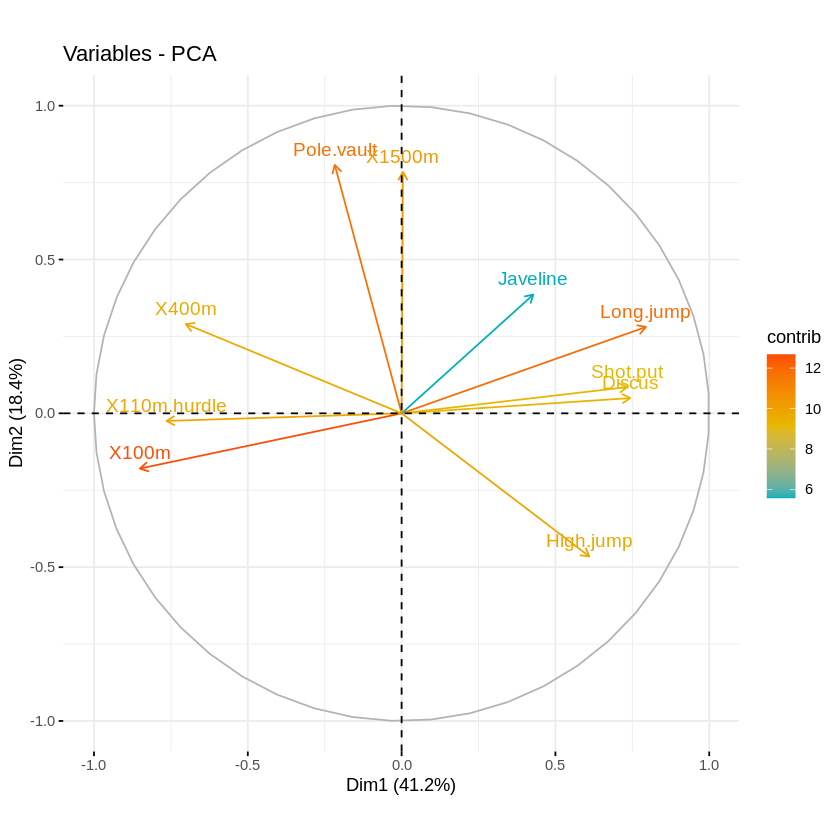

In [29]:
fviz_pca_var(res.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
             )

Description des dimensions
Dans les sections précédentes, nous avons décrit comment mettre en évidence les variables en fonction de leurs contributions aux composantes principales.

Notez également que la fonction dimdesc() [dans FactoMineR], pour dimension description (en anglais), peut être utilisée pour identifier les variables les plus significativement associées avec une composante principale donnée . Elle peut être utilisée comme suit:

In [30]:
res.desc <- dimdesc(res.pca, axes = c(1,2), proba = 0.05)
# Description de la dimension 1
res.desc$Dim.1

,correlation,p.value
Long.jump,0.7941806,6.059893e-06
Discus,0.7432090,4.842563e-05
Shot.put,0.7339127,6.723102e-05
High.jump,0.6100840,1.993677e-03
Javeline,0.4282266,4.149192e-02
X400m,-0.7016034,1.910387e-04
X110m.hurdle,-0.7641252,2.195812e-05
X100m,-0.8506257,2.727129e-07


In [31]:
# Description de la dimension 2
res.desc$Dim.2

,correlation,p.value
Pole.vault,0.8074511,3.205016e-06
X1500m,0.7844802,9.384747e-06
High.jump,-0.4652142,2.529390e-02


In [32]:
#résultats
ind <- get_pca_ind(res.pca)
ind

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

In [33]:
# Coordonnées des individus
head(ind$coord)
# Qualité des individus
head(ind$cos2)
# Contributions des individus
head(ind$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
SEBRLE,0.1955047,1.5890567,0.6424912,0.08389652,1.16829387
CLAY,0.8078795,2.4748137,-1.3873827,1.29838232,-0.82498206
BERNARD,-1.3591340,1.6480950,0.2005584,-1.96409420,0.08419345
YURKOV,-0.8889532,-0.4426067,2.5295843,0.71290837,0.40782264
ZSIVOCZKY,-0.1081216,-2.0688377,-1.3342591,-0.10152796,-0.20145217
McMULLEN,0.1212195,-1.0139102,-0.8625170,1.34164291,1.62151286


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
SEBRLE,0.007530179,0.49747323,0.081325232,0.001386688,0.2689026575
CLAY,0.048701249,0.45701660,0.143628117,0.125791741,0.0507850580
BERNARD,0.197199804,0.28996555,0.004294015,0.411819183,0.0007567259
YURKOV,0.096109800,0.02382571,0.778230322,0.061812637,0.0202279796
ZSIVOCZKY,0.001574385,0.57641944,0.239754152,0.001388216,0.0054654972
McMULLEN,0.002175437,0.15219499,0.110137872,0.266486530,0.3892621478


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
SEBRLE,0.04029447,5.9714533,1.4483919,0.03734589,8.45894063
CLAY,0.68805664,14.4839248,6.7537381,8.94458283,4.21794385
BERNARD,1.94740183,6.4234107,0.1411345,20.46819433,0.04393073
YURKOV,0.83308415,0.4632733,22.4517396,2.69663605,1.03075263
ZSIVOCZKY,0.01232413,10.1217143,6.2464325,0.05469230,0.25151025
McMULLEN,0.01549089,2.4310854,2.6102794,9.55055888,16.29493304


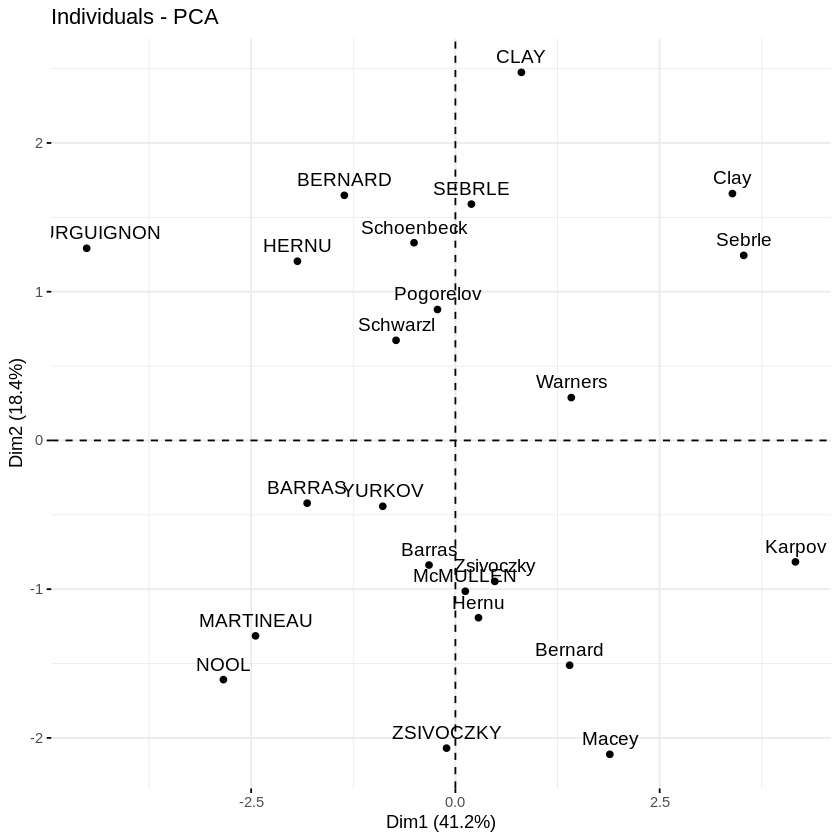

In [34]:
fviz_pca_ind (res.pca)

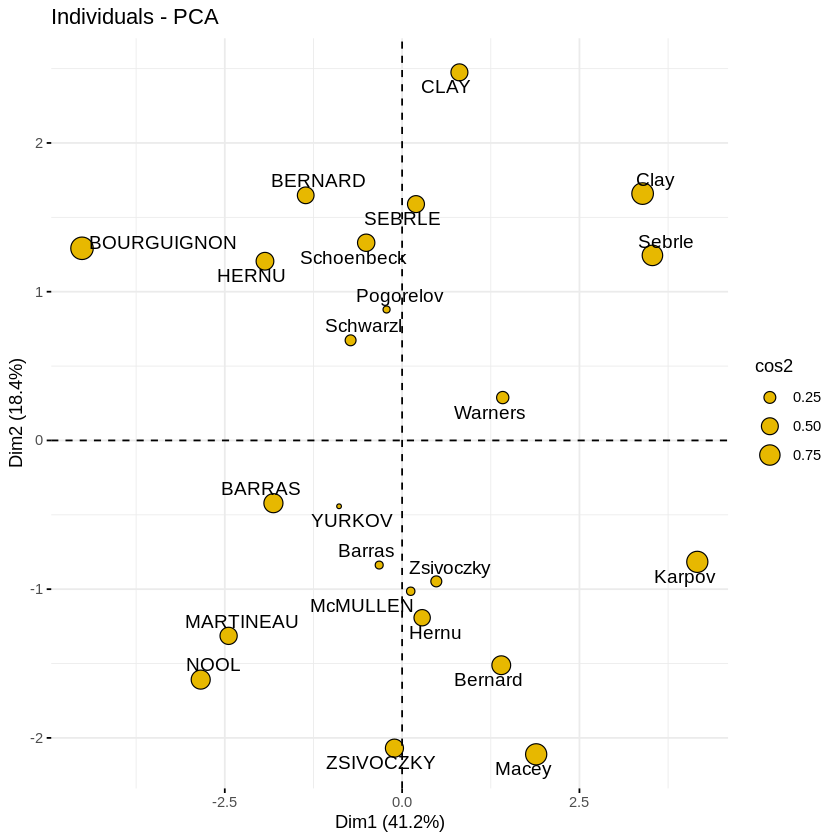

In [35]:
# Vous pouvez également modifier la taille des points en fonction du cos2 des individus correspondants:
fviz_pca_ind (res.pca, pointsize = "cos2",
             pointshape = 21, fill = "#E7B800",
             repel = TRUE # Évite le chevauchement de texte
             )

Colorer par groupes

In [36]:
head(iris, 3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [37]:
# La variable Species (index = 5) est supprimée
# avant l'ACP
iris.pca <- PCA(iris [, - 5], graph = FALSE)

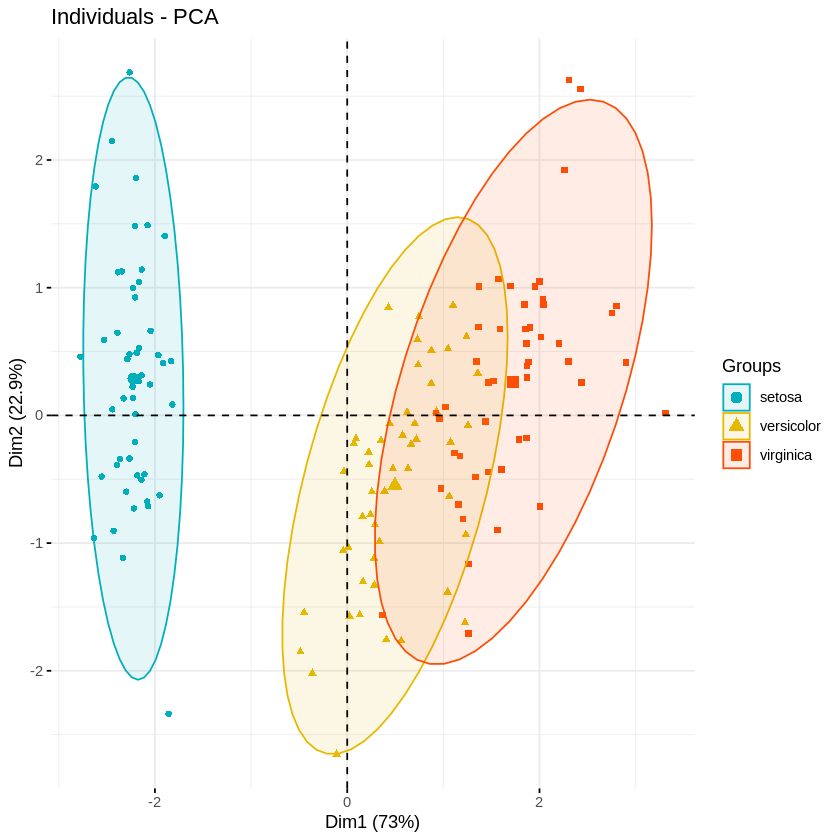

In [38]:
fviz_pca_ind(iris.pca,
             geom.ind = "point", # Montre les points seulement (mais pas le "text")
             col.ind = iris$Species, # colorer by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, # Ellipses de concentration
             legend.title = "Groups"
             )

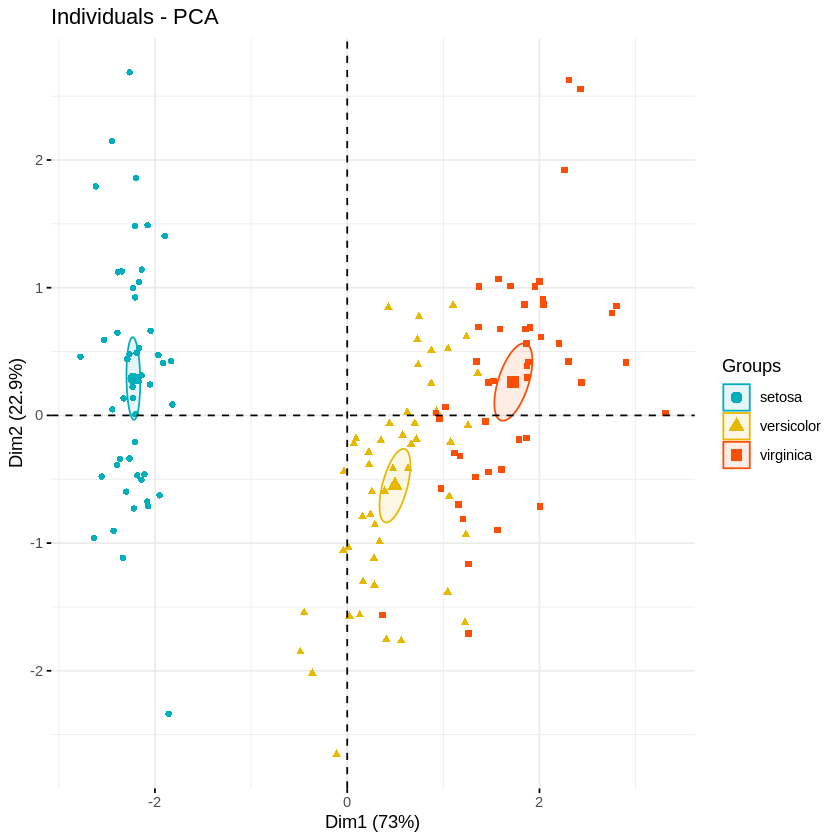

In [39]:
# Ajoutez des ellipses de confiance
fviz_pca_ind(iris.pca, geom.ind = "point", col.ind = iris$Species, 
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, ellipse.type = "confidence",
             legend.title = "Groups"
             )